# Assignement 1 - Data Importing and Preprocessing


Visit here to download the dataset - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
it is compettion dataset, so must jon the competition first and then download and locate it in your workspace.

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv(r"train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Code here to see only numeric and also only categorical


In [25]:
numeric_df = df.select_dtypes(include=['int', 'float'])
categorical_df = df.select_dtypes(exclude=['int','float'])

In [26]:
print(numeric_df.head())
print(categorical_df.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

# Check is there are missing values 
#### Try somethings to these missing values 1) ignore 2) remove 3)replace (with contastan,staticial data, using some ML algorithms)
#### make sure after doing something, you other content will remain unchanged. For example, if you drop null, it might lose other contents of the column because it remvoes the whole rows. Please make sure before and after dropping the null values if you chose to remove

In [27]:
print(df.isnull().sum())

# Fill numeric columns with the mean
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Fill categorical columns with 'NA'
categorical_df.fillna('NA', inplace=True)

# Update the original dataframe
df.update(numeric_df)
df.update(categorical_df)

df.info()
df.head()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


# Check how many rows we have


In [31]:
len(df)

1460

# Check how many columns we have

In [12]:
len(df.columns)

81

# Will you use all columns to work on, Or we can choose the most relevant columns from it. You can decide the number.

In [36]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [35]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [55]:
# i chose them, you choose your own
selective_df=df[['Neighborhood','TotRmsAbvGrd','SaleCondition','KitchenAbvGr','OverallCond','Electrical','MasVnrType','HouseStyle','Alley','SalePrice']]
selective_df

,Neighborhood,TotRmsAbvGrd,SaleCondition,KitchenAbvGr,OverallCond,Electrical,MasVnrType,HouseStyle,Alley,SalePrice
0,CollgCr,8,Normal,1,5,SBrkr,BrkFace,2Story,NaN,208500
1,Veenker,6,Normal,1,8,SBrkr,NaN,1Story,NaN,181500
2,CollgCr,6,Normal,1,5,SBrkr,BrkFace,2Story,NaN,223500
3,Crawfor,7,Abnorml,1,5,SBrkr,NaN,2Story,NaN,140000
4,NoRidge,9,Normal,1,5,SBrkr,BrkFace,2Story,NaN,250000
...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,7,Normal,1,5,SBrkr,NaN,2Story,NaN,175000
1456,NWAmes,7,Normal,1,6,SBrkr,Stone,1Story,NaN,210000
1457,Crawfor,9,Normal,1,9,SBrkr,NaN,2Story,NaN,266500
1458,NAmes,5,Normal,1,6,FuseA,NaN,1Story,NaN,142125


In [60]:
#Let's check data types of your column
selective_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighborhood   1460 non-null   int32 
 1   TotRmsAbvGrd   1460 non-null   int64 
 2   SaleCondition  1460 non-null   object
 3   KitchenAbvGr   1460 non-null   int64 
 4   OverallCond    1460 non-null   int64 
 5   Electrical     1459 non-null   object
 6   MasVnrType     588 non-null    object
 7   HouseStyle     1460 non-null   object
 8   Alley          91 non-null     object
 9   SalePrice      1460 non-null   int64 
dtypes: int32(1), int64(4), object(5)
memory usage: 108.5+ KB


In [57]:
selective_df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [ ]:
# Use some encoding techniques here for your categoical data
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

selective_df['Neighborhood'] = label_encoder.fit_transform(df['Neighborhood'])

print(selective_df.head())

   Neighborhood  TotRmsAbvGrd SaleCondition  KitchenAbvGr  OverallCond  \
0             5             8        Normal             1            5   
1            24             6        Normal             1            8   
2             5             6        Normal             1            5   
3             6             7       Abnorml             1            5   
4            15             9        Normal             1            5   

  Electrical MasVnrType HouseStyle Alley  SalePrice  
0      SBrkr    BrkFace     2Story   NaN     208500  
1      SBrkr        NaN     1Story   NaN     181500  
2      SBrkr    BrkFace     2Story   NaN     223500  
3      SBrkr        NaN     2Story   NaN     140000  
4      SBrkr    BrkFace     2Story   NaN     250000  


C:\Users\akw97\AppData\Local\Temp\ipykernel_14580\485694032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selective_df['Neighborhood'] = label_encoder.fit_transform(df['Neighborhood'])


In [61]:
selective_df.select_dtypes(include='O')

,SaleCondition,Electrical,MasVnrType,HouseStyle,Alley
0,Normal,SBrkr,BrkFace,2Story,NaN
1,Normal,SBrkr,NaN,1Story,NaN
2,Normal,SBrkr,BrkFace,2Story,NaN
3,Abnorml,SBrkr,NaN,2Story,NaN
4,Normal,SBrkr,BrkFace,2Story,NaN
...,...,...,...,...,...
1455,Normal,SBrkr,NaN,2Story,NaN
1456,Normal,SBrkr,Stone,1Story,NaN
1457,Normal,SBrkr,NaN,2Story,NaN
1458,Normal,FuseA,NaN,1Story,NaN


In [48]:
# I have one column that has a lot of missing values, so I replace it with "Cobblestone"
selective_df['Alley']=selective_df['Alley'].fillna('Cobbelstone')  

In [49]:
selective_df.isnull().sum()

Neighborhood     0
TotRmsAbvGrd     0
SaleCondition    0
KitchenAbvGr     0
OverallCond      0
Electrical       0
MasVnrType       0
HouseStyle       0
Alley            0
SalePrice        0
dtype: int64

In [50]:
selective_df['MasVnrType'].value_counts()

MasVnrType
NA         872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [51]:
#I will replace with stone to null values of MasVnrType
selective_df['MasVnrType']=selective_df['MasVnrType'].fillna('Stone')  

In [52]:
selective_df.isnull().sum()

Neighborhood     0
TotRmsAbvGrd     0
SaleCondition    0
KitchenAbvGr     0
OverallCond      0
Electrical       0
MasVnrType       0
HouseStyle       0
Alley            0
SalePrice        0
dtype: int64

## Now we clear missing values

# Write a custom function that will convert from categorical to numeric 
def convert_data(data) # the input must be one featuer and it should return corresponding transformed data

In [62]:
def convert_data(df, col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df

for col in selective_df.select_dtypes('O').columns:
    selective_df = convert_data(selective_df, col)

selective_df
    

C:\Users\akw97\AppData\Local\Temp\ipykernel_14580\550119264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\akw97\AppData\Local\Temp\ipykernel_14580\550119264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\akw97\AppData\Local\Temp\ipykernel_14580\550119264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Neighborhood,TotRmsAbvGrd,SaleCondition,KitchenAbvGr,OverallCond,Electrical,MasVnrType,HouseStyle,Alley,SalePrice
0,5,8,4,1,5,4,1,5,2,208500
1,24,6,4,1,8,4,3,2,2,181500
2,5,6,4,1,5,4,1,5,2,223500
3,6,7,0,1,5,4,3,5,2,140000
4,15,9,4,1,5,4,1,5,2,250000
...,...,...,...,...,...,...,...,...,...,...
1455,8,7,4,1,5,4,3,5,2,175000
1456,14,7,4,1,6,4,2,2,2,210000
1457,6,9,4,1,9,4,3,5,2,266500
1458,12,5,4,1,6,0,3,2,2,142125


In [63]:
selective_df.head()

,Neighborhood,TotRmsAbvGrd,SaleCondition,KitchenAbvGr,OverallCond,Electrical,MasVnrType,HouseStyle,Alley,SalePrice
0,5,8,4,1,5,4,1,5,2,208500
1,24,6,4,1,8,4,3,2,2,181500
2,5,6,4,1,5,4,1,5,2,223500
3,6,7,0,1,5,4,3,5,2,140000
4,15,9,4,1,5,4,1,5,2,250000


# Now that we cleaned the data and already transformed
# Check data distribution of data to know they should be normalized/scaled or not
# in this case, we normally more foucs on the original numeric data instead of transformed numeric numbers.

<Axes: >

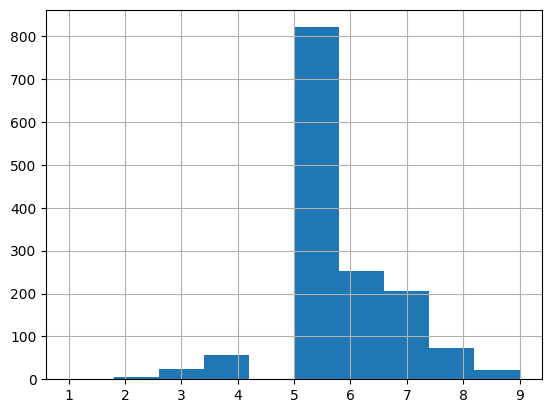

In [64]:
selective_df['OverallCond'].hist()  #Displays a histogram showing the frequency distribution of values in the 'OverallCond' column, illustrating how data points are spread across different categories or ranges.

In [ ]:
# let's find the variance and mean of OverallCond
df['OverallCond'].var()

1.2383223637883065

In [66]:
df['OverallCond'].mean()

5.575342465753424

Interpretation:<br>
Low variance relative to mean → Data is less dispersed.<br>
High variance relative to mean → Data is more spread out.<br>
<hr>
Should You Normalize?
If variance is significantly less than the mean, the data is already relatively compact, and normalization may not be necessary.<br>
However, if you're using models that are sensitive to scale (e.g., k-NN, SVM, neural networks), standardization (z-score scaling) might still be beneficial.

# Lets check all dispersion rate of all columns

array([[<Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'SaleCondition'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'Electrical'}>],
       [<Axes: title={'center': 'MasVnrType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'Alley'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >, <Axes: >]],
      dtype=object)

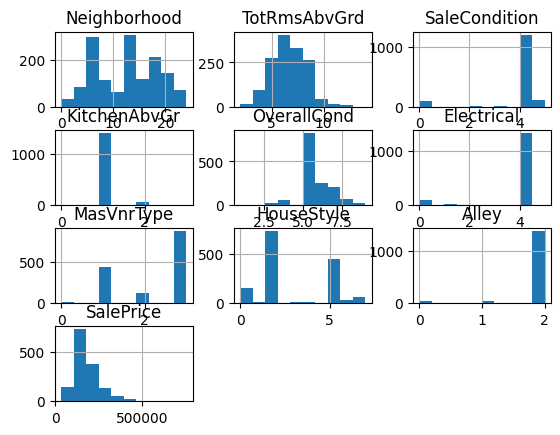

In [67]:
selective_df.hist()

In [68]:
selective_df.columns

Index(['Neighborhood', 'TotRmsAbvGrd', 'SaleCondition', 'KitchenAbvGr',
       'OverallCond', 'Electrical', 'MasVnrType', 'HouseStyle', 'Alley',
       'SalePrice'],
      dtype='object')

In [75]:
# I will go standard scaler except saleprice - which appears to be class label here
# there are three scaler i will be using for MaxAbsScaler - please figure out yourselves
# here there is no specific meaning of why we choose this scaler for this attribute, just want to show you variety of scaler usages


from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
std=StandardScaler()
mm_scaler=MinMaxScaler()
max_abs=MaxAbsScaler()

#fill out your code here
standard_scaled = std.fit_transform(numeric_df)
standard_scaled_df = pd.DataFrame(standard_scaled, columns = numeric_df.columns)
minmax_scaled = mm_scaler.fit_transform(numeric_df)
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=numeric_df.columns)

maxabs_scaled = max_abs.fit_transform(numeric_df)
maxabs_scaled_df = pd.DataFrame(maxabs_scaled, columns=numeric_df.columns)

print(numeric_df.head())
print(standard_scaled_df.head())
print(minmax_scaled_df.head())
print(maxabs_scaled_df.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

array([[<Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'SaleCondition'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'Electrical'}>],
       [<Axes: title={'center': 'MasVnrType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'Alley'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >, <Axes: >]],
      dtype=object)

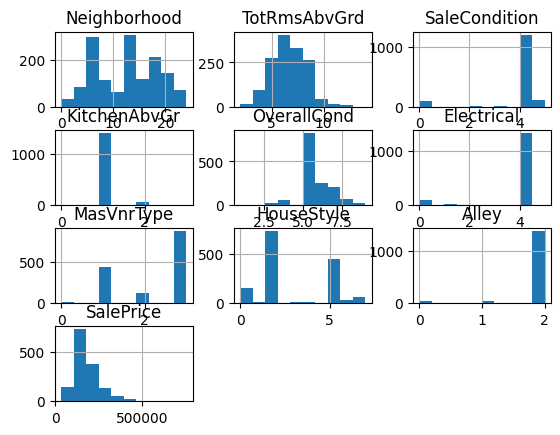

In [78]:
selective_df.hist()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

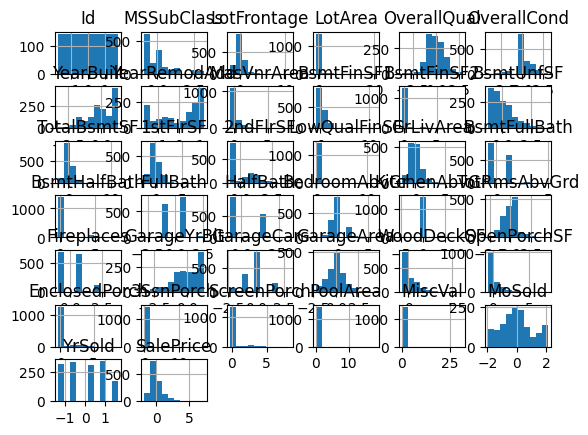

In [77]:
standard_scaled_df.hist()